In [1]:
#imports
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree, preprocessing
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#raw data
df = pd.read_csv('Fires.csv')

C:\Users\Max\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,NaN
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,NaN
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,NaN
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,NaN
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,NaN


In [4]:
#Preprocessing
df['DISC_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['CONTAIN_DATE'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['DURATION'] = df['CONTAIN_DATE'] - df['DISC_DATE']

le = preprocessing.LabelEncoder()
df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
df['STATE'] = le.fit_transform(df['STATE'])
df['FIRE_SIZE_CLASS'] = le.fit_transform(df['FIRE_SIZE_CLASS'])

In [5]:
#filtering out unimportant columns
data = df[['FOD_ID',
           'FPA_ID',
           'FIRE_CODE',
           'FIRE_NAME',
           'FIRE_YEAR',
           'DISCOVERY_DATE',
           'DISCOVERY_DOY',
           'DISCOVERY_TIME',
           'STAT_CAUSE_CODE',
           'STAT_CAUSE_DESCR',
           'CONTAIN_DATE',
           'CONT_DOY',
           'CONT_TIME',
           'FIRE_SIZE',
           'FIRE_SIZE_CLASS',
           'LATITUDE',
           'LONGITUDE',
           'STATE',
           'COUNTY',
           'DISC_DATE',
           'CONTAIN_DATE',
           'DURATION']]

In [6]:
#dropping rows with NA
data = data.dropna()
print(data.head())

    FOD_ID      FPA_ID FIRE_CODE FIRE_NAME  FIRE_YEAR  DISCOVERY_DATE  \
0        1  FS-1418826      BJ8K  FOUNTAIN       2005       2453403.5   
1        2  FS-1418827      AAC0    PIGEON       2004       2453137.5   
2        3  FS-1418835      A32W     SLACK       2004       2453156.5   
17      18  FS-1418881      BHA3     FREDS       2004       2453291.5   
19      20  FS-1418887      AVPA    SPRING       2004       2453160.5   

    DISCOVERY_DOY  DISCOVERY_TIME  STAT_CAUSE_CODE  STAT_CAUSE_DESCR  ...  \
0              33          1300.0              9.0                 7  ...   
1             133           845.0              1.0                 6  ...   
2             152          1921.0              5.0                 3  ...   
17            287          1618.0              2.0                 4  ...   
19            156          1030.0              1.0                 6  ...   

   CONT_TIME  FIRE_SIZE  FIRE_SIZE_CLASS   LATITUDE   LONGITUDE  STATE  \
0     1730.0       0.10 

# Decision Tree

In [7]:
#set X and y as fire duration and fire size
X = data[['STAT_CAUSE_DESCR', 'LATITUDE', 'LONGITUDE', 'DURATION', 'STATE']]
X['DURATION'] = data['DURATION'].dt.total_seconds().values
y = data['FIRE_SIZE_CLASS'].values

C:\Users\Max\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
#creating regression model
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [10]:
#create predicted values from test set
y_pred = decision_tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6210948579764172


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28235  1019     0     0     0     0     0]
 [11417  2421     0     0     0     0     0]
 [ 2454  1070     0     0     0     0     0]
 [  758   218     0     0     0     0     0]
 [  623   102     0     0     0     0     0]
 [  594    52     0     0     0     0     0]
 [  380    15     0     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.64      0.97      0.77     29254
           1       0.49      0.17      0.26     13838
           2       0.00      0.00      0.00      3524
           3       0.00      0.00      0.00       976
           4       0.00      0.00      0.00       725
           5       0.00      0.00      0.00       646
           6       0.00      0.00      0.00       395

    accuracy                           0.62     49358
   macro avg       0.16      0.16      0.15     49358
weighted avg       0.51      0.62      0.53     49358



C:\Users\Max\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
#compare actual vs predicted values
test_vs_pred = pd.DataFrame({'Actual': np.squeeze(y_test), 'Predicted': np.squeeze(y_pred)})
test_vs_pred

,Actual,Predicted
0,1,0
1,0,0
2,2,0
3,1,0
4,1,1
...,...,...
49353,0,0
49354,1,0
49355,1,0
49356,0,1


[Text(167.4, 190.26, 'X[3] <= 129600.0\nentropy = 1.579\nsamples = 115168\nvalue = [68161, 32182, 8310, 2346, 1736, 1489, 944]'),
 Text(83.7, 135.9, 'X[2] <= -104.993\nentropy = 1.322\nsamples = 94159\nvalue = [60528, 25976, 5473, 1175, 647, 306, 54]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 43200.0\nentropy = 1.199\nsamples = 81771\nvalue = [56719, 20043, 3331, 840, 521, 267, 50]'),
 Text(20.925, 27.180000000000007, 'entropy = 1.054\nsamples = 59471\nvalue = [43405, 13675, 1757, 377, 174, 68, 15]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 1.515\nsamples = 22300\nvalue = [13314, 6368, 1574, 463, 347, 199, 35]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 43.384\nentropy = 1.708\nsamples = 12388\nvalue = [3809, 5933, 2142, 335, 126, 39, 4]'),
 Text(104.625, 27.180000000000007, 'entropy = 1.716\nsamples = 9261\nvalue = [2098, 4783, 1940, 296, 111, 30, 3]'),
 Text(146.475, 27.180000000000007, 'entropy = 1.406\nsamples = 3127\nvalue = [1711, 1150, 202, 39, 15,

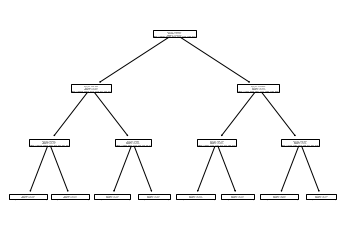

In [13]:
tree.plot_tree(decision_tree)

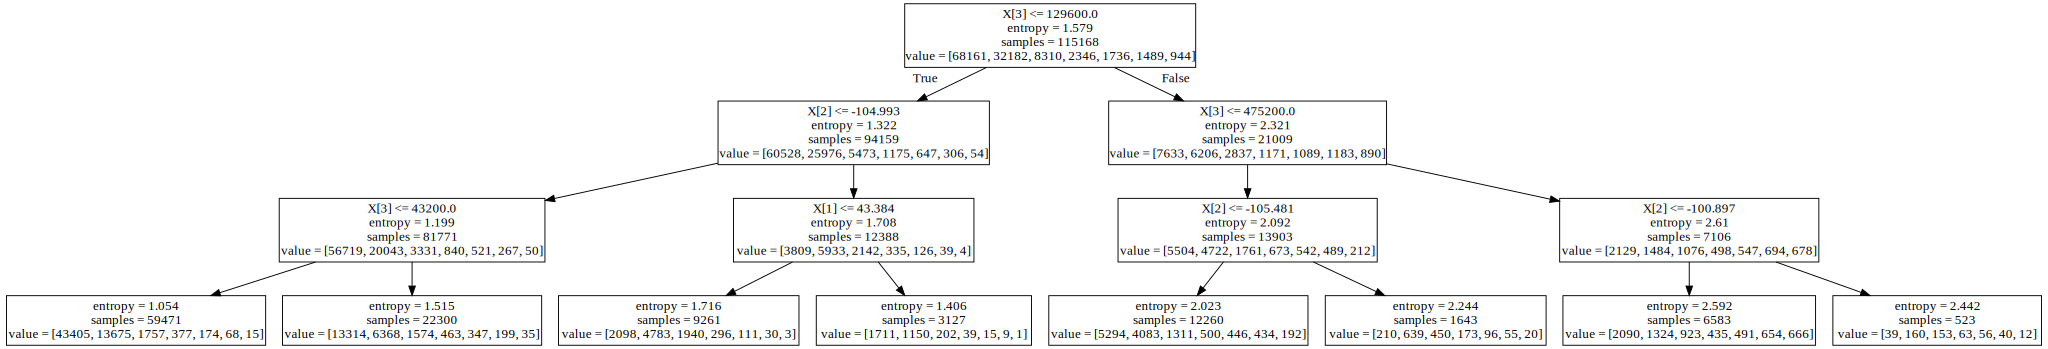

In [14]:
import graphviz
dot_data = tree.export_graphviz(decision_tree, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Normalized Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min()))

Mean Absolute Error: 0.5967624295960128
Mean Squared Error: 1.451416183799992
Root Mean Squared Error: 1.2047473526843675
Normalized Root Mean Squared Error: 0.20079122544739458
